# Анализ влияния смартфонов на подростков

- Автор: Гринько Яна
- Дата: сентябрь 2025

### Цели и задачи проекта

**Цель:** Провести исследовательский анализ влияния использования смартфонов на здоровье и уровень зависимости подростков
    
**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных (при необходимости).
3. Провести исследовательский анализ данных:
    - проанализировать основные цели использования смартфонов подростками
    - проанализировать подростки какого возраста присутсвуют в выборке
    - проанализировать взаимосвязь возраста и психологических показателей
    - исследовать общее время, проводимое подростками в смартфонах в течение дня, определить статистические показатели;
    - проанализировать распределение времени, проводимого подростками в смартфонах в течение дня по гендеру, классу школы, академической успеваемости, уровням тревожности, депрессии, самооценки, количеству часов физической активности в неделю, уровню коммуникации с семьей. Провести корреляционный анализ перечисленных данных
    - проанализировать успеваемость подростков
4. Сформулировать выводы по проведённому анализу.

### Данные

Для анализа используются данные о подростках Великобритании, собранные в 2025 году

### Описание датасета `teen_phone_addiction_dataset`

- `Age` — Возраст участника (в годах)
- `ID` — ID участника
- `Name` — Имя участника
- `Gender` — Гендерная идентичность участника
- `Location` — Город участника
- `School_Grade` — Класс в котором учится участник
- `Daily_Usage_Hours` — Время использования смартфона в день
- `Sleep_Hours` — Длительность сна
- `Social_Interaction` — Уровень социального взаимодействия
- `Anxiety_Level` — Уровень тревожности
- `Depression_Level` — Уровень депрессии
- `Self_Esteem` — Самооценка
- `Parental_Control` — Наличие родительского контроля
- `Time_on_Social_Media` — Среднее ежедневное время, проводимое в смартфоне социальных сетях (в часах)
- `Time_on_Education` — Ежедневное время, проводимое в смартфоне за учёбой/обучением (в часах)
- `Time_on_Gaming` — Ежедневное время, проводимое в смартфоне за играми (в часах)
- `Phone_Checks_Per_Day` — Сколько раз участник проверяет свой телефон в день
- `Phone_Usage_Purpose` — Основная цель использования телефона (например, социальные сети, игры, образование и т. д.)
- `Exercise_Hours` — Количество часов физической активности в неделю
- `Academic_Performance` — Академический балл или средний балл
- `Addiction_Level` — Численное измерение степени зависимости от телефона/экрана (для отнесения к категории МО)
- `Screen_Time_Before_Bed` — Время проведенное в смартфоне перед сном
- `Apps_Used_Daily` — Количество приложений используемых ежедневно
- `Family_Communication` — Уровень коммуникации с семьей
- `Weekend_Usage_Hours` — Время использования смартфона на выходных

## Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасета. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в переменной: `teen_phone_addiction_df`.

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from phik import phik_matrix

In [2]:
# Выгружаем данные в переменную
teen_phone_addiction_df = pd.read_csv('teen_phone_addiction_dataset.csv')

In [3]:
# Выводим первые строки датафрейма на экран
teen_phone_addiction_df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [4]:
# Выводим информацию о датафрейме
teen_phone_addiction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [5]:
# Проверим количество пропусков (абсолютные значения)
missing_abs = teen_phone_addiction_df.isna().sum()
print(missing_abs)

ID                        0
Name                      0
Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Parental_Control          0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64


<div style="border:solid Chocolate 2px; padding: 10px">

Датасет `teen_phone_addiction_df.csv` содержит 25 столбцов и 3000 строк, в которых представлена информация о подростках, их времяпровождении в смартфонах и данные об их психическом здоровье и физической активности.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов имеют однообразный вид, но не в стиле snake case. Корректно привести наименования столбцов к стилю snake case.
- БОльшая часть данных имеет тип данных `int64` и `float64`, что является корректным поскольку большинство данных содержит количество часов и уровни (тревожности, депрессии и т.д.). Также есть столбцы, описывающие персональные данные подростков, такие как имя, гендерная принадлежность, локация, данные такого характера корректно имеют тип `object`. Значения в столбце `School_Grade` и `Phone_Usage_Purpose` корректнее представить в категориальных данных с типом `category`. Для удобства работы необходимо добавить столбец `parental_control_text` на основании столбца `parental_control` в котором будут значения 0 и 1 заменены на "Нет и "Да". Также необходимо добавить столбец с категориальными данными `academic_performance_level`, в котором успеваемость по столбцу `academic_performance` будет приведена к системе A-levels, используемой в Великобритании в старших классах и каждому ученику будет присвоен балл от U до А+.
- Пропуски в данных отсутсвуют.
- Значения в столбцах соответствуют описанию

In [6]:
# Приведем все столбцы к стилю snake case 
def to_snake_case(name):
    name = name.strip()                          # Удаляем пробелы по краям
    name = " ".join(name.split())                # Удаляем повторяющиеся пробелы внутри
    name = name.lower()                          # Приводим к нижнему регистру
    name = name.replace(" ", "_")                # Заменяем пробелы на нижние подчеркивания
    return name

# Преобразование всех названий столбцов
teen_phone_addiction_df.columns = [to_snake_case(col) for col in teen_phone_addiction_df.columns]

# Проверка наименований столбцов после преобразования
teen_phone_addiction_df.columns

Index(['id', 'name', 'age', 'gender', 'location', 'school_grade',
       'daily_usage_hours', 'sleep_hours', 'academic_performance',
       'social_interactions', 'exercise_hours', 'anxiety_level',
       'depression_level', 'self_esteem', 'parental_control',
       'screen_time_before_bed', 'phone_checks_per_day', 'apps_used_daily',
       'time_on_social_media', 'time_on_gaming', 'time_on_education',
       'phone_usage_purpose', 'family_communication', 'weekend_usage_hours',
       'addiction_level'],
      dtype='object')

In [7]:
# Преобразуем тип данных в столбцах school_grade и phone_usage_purpose
teen_phone_addiction_df['school_grade'] = teen_phone_addiction_df['school_grade'].astype('category')
teen_phone_addiction_df['phone_usage_purpose'] = teen_phone_addiction_df['phone_usage_purpose'].astype('category')

In [8]:
# Добавим столбец academic_performance_level с уровнем успеваемости по системе A-levels
teen_phone_addiction_df['academic_performance_level'] = pd.cut(teen_phone_addiction_df['academic_performance'],
                                         bins=[0, 40, 50, 60, 70, 80, 90, 101],
                                         labels=['U', 'E', 'D', 'C', 'B', 'A', 'A+'],
                                         right=True)

In [9]:
# Добавим столбец parental_control_text со значениями Ди и Нет
teen_phone_addiction_df['parental_control_text'] = teen_phone_addiction_df['parental_control'].replace({1: 'Да', 0: 'Нет'}).fillna('Неизвестно')

In [10]:
# Проверим уникальные значения в добавленных столбцах
for column in ['parental_control_text', 'academic_performance_level']:
    print(f'Уникальные значения в столбце {column}:')
    print(teen_phone_addiction_df[column].sort_values().unique())
    print()

Уникальные значения в столбце parental_control_text:
['Да' 'Нет']

Уникальные значения в столбце academic_performance_level:
['E', 'D', 'C', 'B', 'A', 'A+']
Categories (7, object): ['U' < 'E' < 'D' < 'C' < 'B' < 'A' < 'A+']



In [11]:
# Выводим информацию о датафрейме после преобразования наименования столбцов и типа данных
teen_phone_addiction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          3000 non-null   int64   
 1   name                        3000 non-null   object  
 2   age                         3000 non-null   int64   
 3   gender                      3000 non-null   object  
 4   location                    3000 non-null   object  
 5   school_grade                3000 non-null   category
 6   daily_usage_hours           3000 non-null   float64 
 7   sleep_hours                 3000 non-null   float64 
 8   academic_performance        3000 non-null   int64   
 9   social_interactions         3000 non-null   int64   
 10  exercise_hours              3000 non-null   float64 
 11  anxiety_level               3000 non-null   int64   
 12  depression_level            3000 non-null   int64   
 13  self_esteem       

In [12]:
# Вывод уникальных значений в столбцах с категориальными данными. Для определения необходимости нормализации
for column in ['school_grade','phone_usage_purpose']:
    print(f'Уникальные значения в столбце {column}:')
    print(teen_phone_addiction_df[column].sort_values().unique())
    print()

Уникальные значения в столбце school_grade:
['10th', '11th', '12th', '7th', '8th', '9th']
Categories (6, object): ['10th', '11th', '12th', '7th', '8th', '9th']

Уникальные значения в столбце phone_usage_purpose:
['Browsing', 'Education', 'Gaming', 'Other', 'Social Media']
Categories (5, object): ['Browsing', 'Education', 'Gaming', 'Other', 'Social Media']



Наименования столбцов приведены к стилю snake case, тип данных в столбцах с категориями преобразован. В столбцах с категориальными данными отсутствуют значения, которые необходимо нормализовывать. 

In [13]:
# Проверка наличия явных дубликатов

duplicated_rows = teen_phone_addiction_df.duplicated().sum()

print(f"Количество явных дубликатов: {duplicated_rows}")

Количество явных дубликатов: 0


In [14]:
# Проверим дубликаты по столбцу id:

teen_phone_addiction_df[teen_phone_addiction_df.duplicated(subset=['id'], keep=False)]

,id,name,age,gender,location,school_grade,daily_usage_hours,sleep_hours,academic_performance,social_interactions,...,apps_used_daily,time_on_social_media,time_on_gaming,time_on_education,phone_usage_purpose,family_communication,weekend_usage_hours,addiction_level,academic_performance_level,parental_control_text


Явные и неявные дубликаты отсутствуют

<div style="border:solid Chocolate 2px; padding: 10px">

В датасете `teen_phone_addiction_df.csv` наименования столбцов приведены к стилю snake case,  добавлены два столбца: `parental_control_text` со значениями Ди и Нет и `academic_performance_level` на основании столбца `academic_performance` по следующим правилам приведения баллов успеваемости к системе A-levels:
    
    A+   от 90 баллов и более 
    A	от 80 - 90
    B	от 70 - 80
    C	от 60 - 70
    D	от 50 - 60
    E	от 40 - 50
    U	ниже 40
    
Данные проверены на наличие явных и неявных дубликатов - дубликаты отсутсвуют. В категориальных данных отсутсвуют значения, требующие нормализации

## Исследовательский анализ данных

### Задача 1

Проанализируем основные цели использования смартфонов подростками

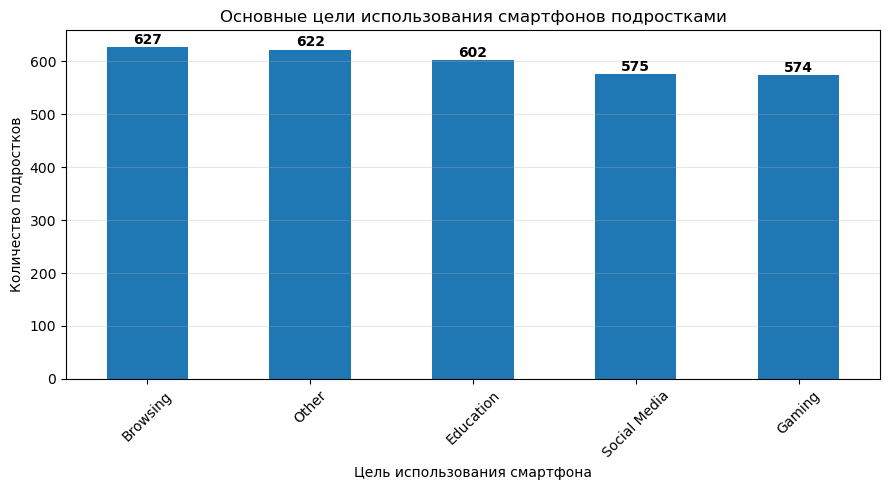

In [15]:
# Группировка по категориям целей использования смартфонов и подсчёт количества подростков
count_teen_purpose = (teen_phone_addiction_df.groupby('phone_usage_purpose', observed=False)['id']
                      .agg(count_teenagers='count')
                      .sort_values('count_teenagers', ascending=False)
                      .reset_index())

# Строим столбчатую диаграмму
ax = count_teen_purpose.plot(
    kind='bar',
    x='phone_usage_purpose',
    y='count_teenagers',
    rot=45,
    legend=False,
    title='Основные цели использования смартфонов подростками',
    figsize=(9, 5)
)

# Добавляем подписи значений на столбцах
for i, v in enumerate(count_teen_purpose['count_teenagers']):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.xlabel('Цель использования смартфона')
plt.ylabel('Количество подростков')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

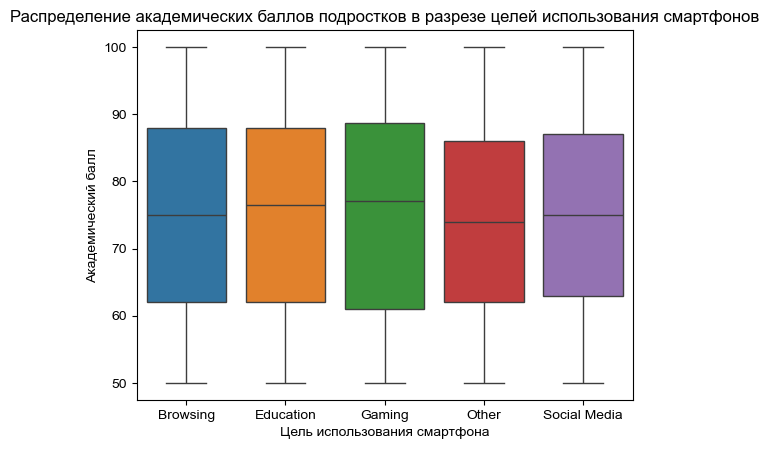

In [16]:
# Сравним распределение академических баллов по целям использования смартфона. Для этого построим boxplot 

sns.boxplot(y='academic_performance', x='phone_usage_purpose', data=teen_phone_addiction_df, hue="phone_usage_purpose", dodge=False)
sns.set(rc={'figure.figsize':(12,5)})
plt.title('Распределение академических баллов подростков в разрезе целей использования смартфонов')
plt.xlabel('Цель использования смартфона')
plt.ylabel('Академический балл')
plt.show()

<div style="border:solid Chocolate 2px; padding: 10px">
<b>Вывод:</b> 
<br/>
Наиболее часто основной целью использования подростками смартфонов является просмотр интернета, на втором месте - прочие цели, на третьем месте - образование. Наименее часто смартфон используется для игр. Разница между всеми целями - незначительная.
    
Средний академический балл подростков (около 75 баллов) в разрезе целей использования отличается незначительно. Распределение баллов в разрезе целей использования смартфонов также схожее, что говорит о том, что нет корреляции успеваемости подростков и целей использования смартфонов

### Задача 2

Проанализируем подростки какого возраста присутствуют в выборке

In [17]:
# Максимальное и минимальное значение возраста подростков в выборке
max_age = teen_phone_addiction_df['age'].max()
min_age = teen_phone_addiction_df['age'].min()

print(f"Максимальный возраст: {max_age} лет")
print(f"Минимальный возраст: {min_age} лет")

Максимальный возраст: 19 лет
Минимальный возраст: 13 лет


In [18]:
# Группируем по возрасту и считаем количество уникальных ID
age_group_count = teen_phone_addiction_df.groupby('age')['id'].count().reset_index()
age_group_count.columns = ['age', 'count_teenagers']

# Сортируем по возрасту
age_group_count = age_group_count.sort_values('age')

print("Количество подростков по возрасту:")
print(age_group_count)

Количество подростков по возрасту:
   age  count_teenagers
0   13              433
1   14              427
2   15              431
3   16              467
4   17              412
5   18              409
6   19              421


<div style="border:solid Chocolate 2px; padding: 10px">
<b>Вывод:</b> 
<br/>
В выборке присутствуют подростки в возрасте от 13 до 19 лет, выборки каждого возраста по количеству подростков сопоставимое (отличается незначительно) - от 421 до 433 респондента

### Задача 3

Исследуем взаимосвязь возраста и психологических показателей (уровень депрессии, тревожности и самооценка)

In [19]:
# Проверяем статистические показатели, в т.ч. максимальные и минимальные значения баллов в столбцах 
# depression_level, anxiety_level, self_esteem

columns_to_analyze = ['depression_level', 'anxiety_level', 'self_esteem']

detailed_stats = teen_phone_addiction_df[columns_to_analyze].describe().round(2)

display(detailed_stats)

,depression_level,anxiety_level,self_esteem
count,3000.00,3000.00,3000.00
mean,5.46,5.59,5.55
std,2.87,2.89,2.86
min,1.00,1.00,1.00
25%,3.00,3.00,3.00
50%,5.00,6.00,6.00
75%,8.00,8.00,8.00
max,10.00,10.00,10.00


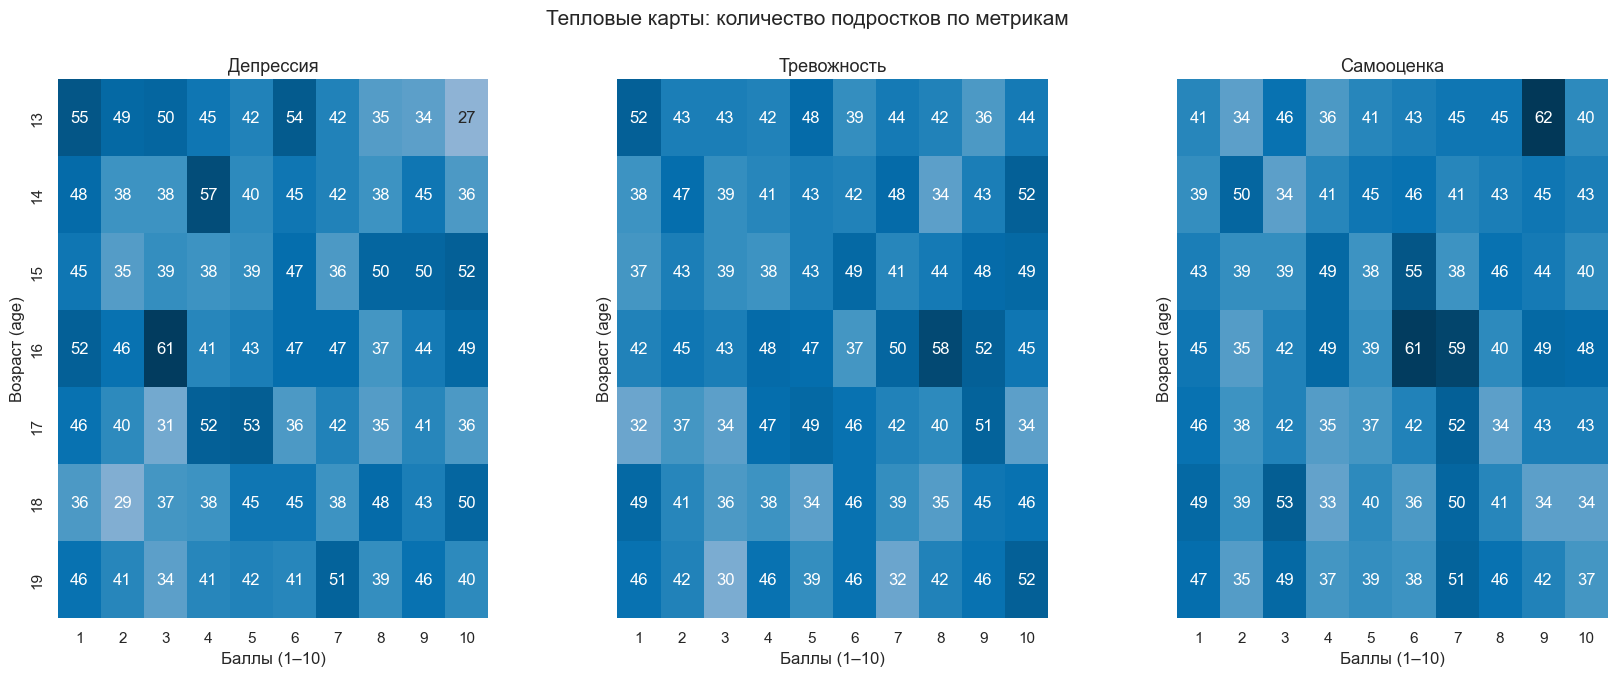

In [20]:


df = teen_phone_addiction_df.copy()

# Оси
ages = np.sort(df["age"].unique())
scores = np.arange(1, 11)

def counts_matrix(d: pd.DataFrame, col: str) -> pd.DataFrame:
    """Формирует матрицу возраст × балл с количеством подростков"""
    s = d.groupby(["age", col]).size()
    age_to_i = {age: i for i, age in enumerate(ages)}
    score_to_j = {score: j for j, score in enumerate(scores)}
    mat = np.zeros((len(ages), len(scores)), dtype=int)
    for (age, score), cnt in s.items():
        if age in age_to_i and score in score_to_j:
            mat[age_to_i[age], score_to_j[score]] = int(cnt)
    return pd.DataFrame(mat, index=ages, columns=scores)

mat_dep = counts_matrix(df, "depression_level")
mat_anx = counts_matrix(df, "anxiety_level")
mat_sel = counts_matrix(df, "self_esteem")

# Общий максимум для единой шкалы цвета
vmax = max(mat_dep.values.max(), mat_anx.values.max(), mat_sel.values.max())

# Рисуем три карты
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)

for ax, mat, title in zip(
    axes,
    [mat_dep, mat_anx, mat_sel],
    ["Депрессия", "Тревожность", "Самооценка"]
):
    sns.heatmap(
        mat,
        cmap="PuBu",
        annot=True,
        fmt="d",
        cbar=False,   # общий colorbar ниже
        vmin=0,
        vmax=vmax,
        ax=ax
    )
    ax.set_title(title, fontsize=13)
    ax.set_xlabel("Баллы (1–10)")
    ax.set_ylabel("Возраст (age)")

plt.subplots_adjust(right=0.9, wspace=0.3)
fig.suptitle("Тепловые карты: количество подростков по метрикам", fontsize=15)
plt.show()

In [21]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = teen_phone_addiction_df[['depression_level', 'anxiety_level', 'self_esteem', 'age']].phik_matrix()
# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной age')
correlation_matrix.loc[correlation_matrix.index != 'age'][['age']].sort_values(by='age', ascending=False) 

interval columns not set, guessing: ['depression_level', 'anxiety_level', 'self_esteem', 'age']
Корреляционная матрица с коэффициентом phi_k для переменной age


,age
depression_level,0.04021
anxiety_level,0.00000
self_esteem,0.00000


<div style="border:solid Chocolate 2px; padding: 10px">
<b>Вывод:</b> 
<br/>
По тепловой карте уровня депресии можно сделать вывод о том, что с 13 до 18 лет депрессивное настроение у подростков склонно учащаться: в 13 лет бОльшее количество подростков имеет уровень депрессии - "1", к 18 годам увеличивается частота наивысшего балла депрессии - "10", в 19 лет распределение баллов более равномерное.
    
По тепловой карте уровня тревожности и самооценки распределение частоты различных уровней по возрастам более равномерное среди подростков

### Задача 4

Исследуем количество часов, проводимых подростками в смартфонах. Определим встречаются ли в данных аномальные значения или выбросы, при их наличии предположим с чем они могут быть связаны.

In [22]:
# Изучаем статистические показатели столбца daily_usage_hours
print('Статистические показатели столбца daily_usage_hours:')
print(teen_phone_addiction_df['daily_usage_hours'].describe())

Статистические показатели столбца daily_usage_hours:
count    3000.000000
mean        5.020667
std         1.956501
min         0.000000
25%         3.700000
50%         5.000000
75%         6.400000
max        11.500000
Name: daily_usage_hours, dtype: float64


Исходя из значений статистических показателей можно сделать вывод о том, что распределение имеет нормальную форму, т.к. медиана незначительно отличается от среднего значения.

Построим визуализацию распределения значений времени, проводимого подростками в смартфонах:

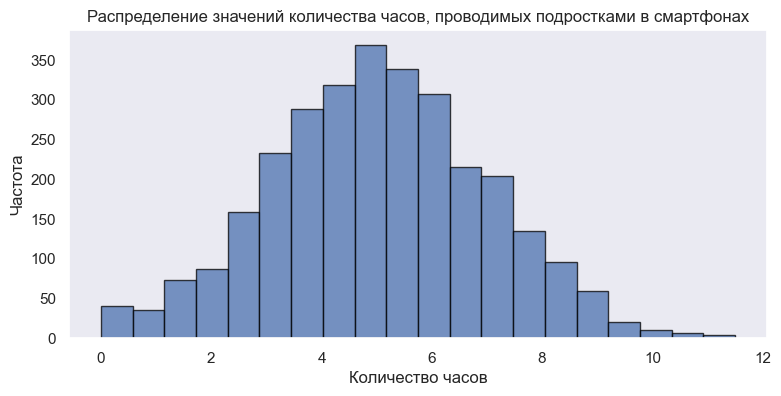

In [23]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(9, 4))

# Строим гистограмму с помощью pandas через plot(kind='hist')
teen_phone_addiction_df['daily_usage_hours'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=20, # Устанавливаем количество корзин - всего 20
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений количества часов, проводимых подростками в смартфонах')
plt.xlabel('Количество часов')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

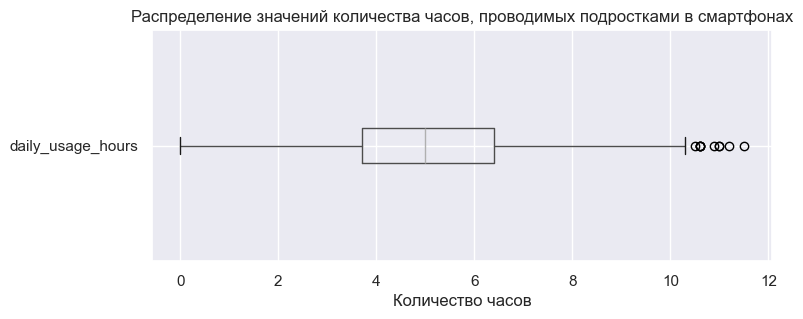

In [24]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 3))

# Строим диаграмму размаха значений в столбце seats
teen_phone_addiction_df.boxplot(column='daily_usage_hours', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества часов, проводимых подростками в смартфонах')
plt.xlabel('Количество часов')

# Выводим график
plt.show()

Наиболее частое количество часов, проводимых подростками в смартфоне лежит в диапазоне от 0 до примерно 10. Все что выше 10 часов можно отнести к выбросам. Однако сами значения, не выглядят ошибкой, т.к. даже максимальное значение часов = 11,5 может быть корректным. Поэтому при анализе данных их оставим.

### Задача 5

Проанализируем распределение времени, проводимого подростками в смартфонах в течение дня по гендеру, классу школы, академической успеваемости, уровням тревожности, депрессии, самооценки, количеству часов физической активности в неделю, уровню коммуникации с семьей. Проведем корреляционный анализ перечисленных данных.

In [25]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = teen_phone_addiction_df[['gender', 'school_grade', 'sleep_hours', 'academic_performance', 'social_interactions',
                         'exercise_hours', 'anxiety_level', 'depression_level', 'self_esteem',
                         'parental_control_text', 'family_communication', 'daily_usage_hours']].phik_matrix()
# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной daily_usage_hours')
correlation_matrix.loc[correlation_matrix.index != 'daily_usage_hours'][['daily_usage_hours']].sort_values(by='daily_usage_hours', ascending=False) 

interval columns not set, guessing: ['sleep_hours', 'academic_performance', 'social_interactions', 'exercise_hours', 'anxiety_level', 'depression_level', 'self_esteem', 'family_communication', 'daily_usage_hours']
Корреляционная матрица с коэффициентом phi_k для переменной daily_usage_hours


,daily_usage_hours
self_esteem,0.082097
parental_control_text,0.078397
sleep_hours,0.074909
social_interactions,0.060038
family_communication,0.039404
gender,0.029858
school_grade,0.024900
anxiety_level,0.012559
academic_performance,0.000000
exercise_hours,0.000000


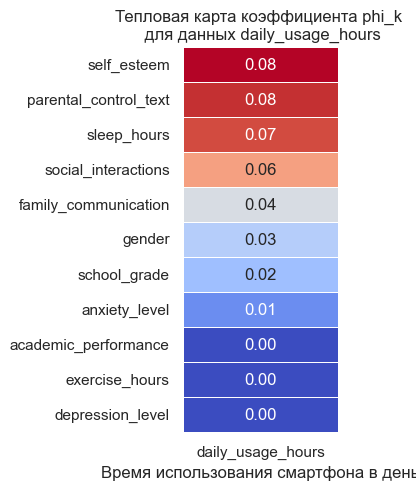

In [26]:
# Строим тепловую карту
plt.figure(figsize=(2, 5))

# Сохраняем матрицу корреляции признака daily_usage_hours с другими признаками
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'daily_usage_hours'][['daily_usage_hours']].sort_values(by='daily_usage_hours', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных daily_usage_hours')
plt.xlabel('Время использования смартфона в день')

# Выводим график
plt.show() 

<div style="border:solid Chocolate 2px; padding: 10px">
<b>Вывод:</b> 
<br/>
Наибольшая корреляция времени использования смартфона в день наблюдается с самооценкой (0.08), родительским контролем (0.08) и временем сна (0.07), но даже самые высокие значения корреляции являются незначительными (менее 0,1). Наименьшая корреляция с временем затраченным на физические упражнения, уровнем депрессии и академической успеваемостью. Выберем самую сильную связь (с самооценкой и контролем родителей) и проверим ее.

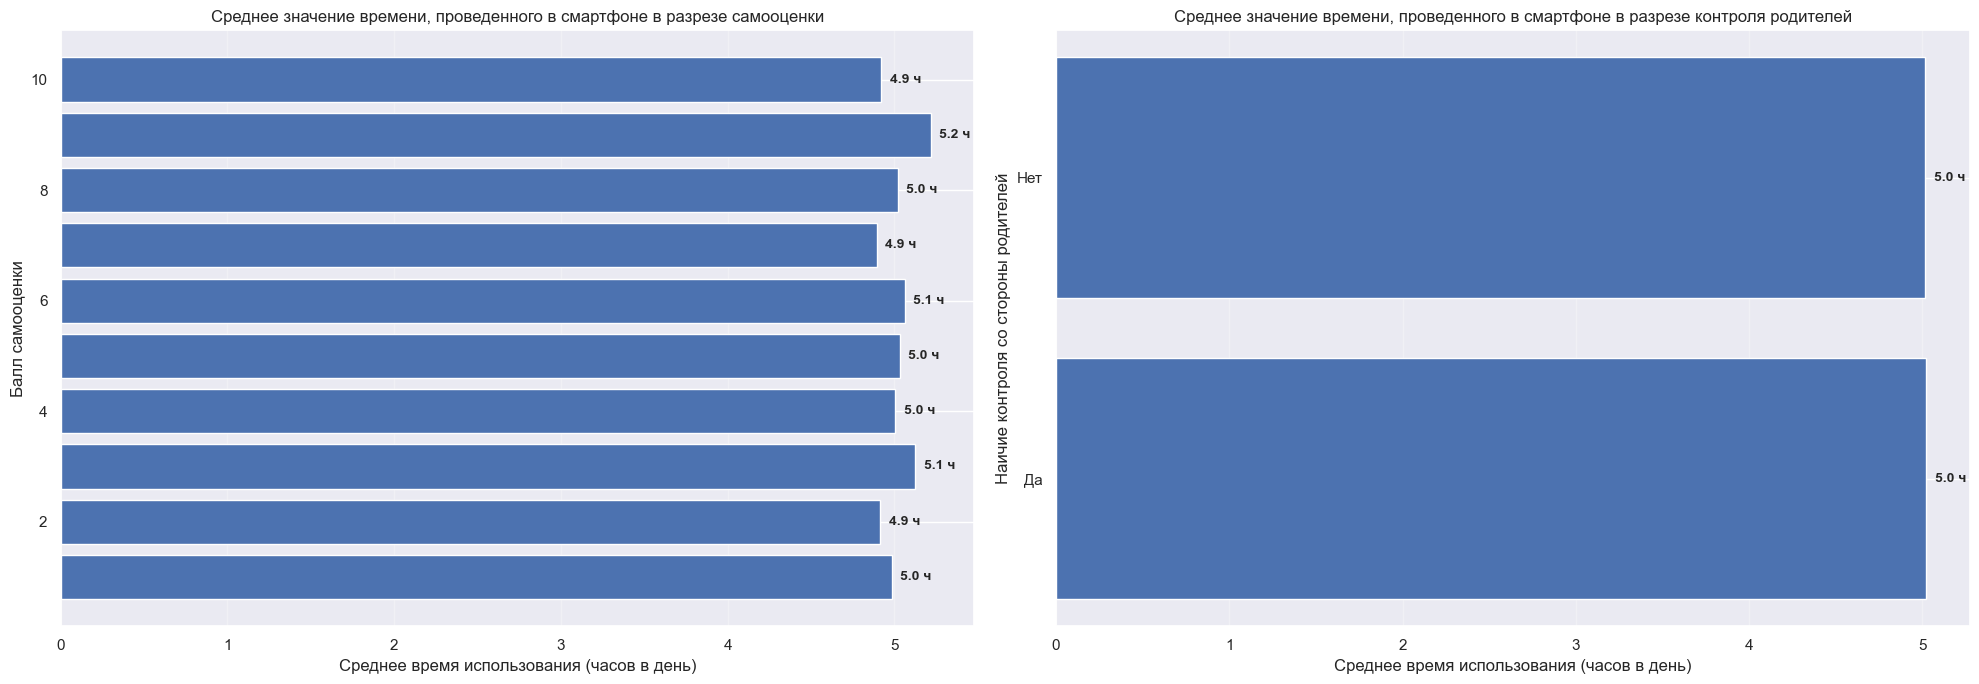

In [27]:
# Группируем данные для визуализаций
# 1. Среднее значение времени, проведенного в смартфоне в разрезе самооценки
mean_daily_hours_self = teen_phone_addiction_df.groupby('self_esteem')['daily_usage_hours'].agg('mean').sort_values(ascending=False)
# 2. Среднее значение времени, проведенного в смартфоне в разрезе контроля родителей
mean_daily_hours_parent = teen_phone_addiction_df.groupby('parental_control_text')['daily_usage_hours'].agg('mean').sort_values(ascending=False)

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(20, 7))

# График 1: Среднее значение времени, проведенного в смартфоне в разрезе гендера
plt.subplot(1, 2, 1)

bars = plt.barh(mean_daily_hours_self.index, mean_daily_hours_self.values)

# Добавляем подписи значений на столбцах
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f} ч', 
             ha='left', va='center', fontweight='bold', fontsize=10)

# Настраиваем оформление
plt.xlabel('Среднее время использования (часов в день)')
plt.ylabel('Балл самооценки')
plt.title('Среднее значение времени, проведенного в смартфоне в разрезе самооценки')
plt.grid(axis='x', alpha=0.3)

# График 2: Среднее значение времени, проведенного в смартфоне в разрезе контроля родителей
plt.subplot(1, 2, 2)

bars = plt.barh(mean_daily_hours_parent.index, mean_daily_hours_parent.values)

# Добавляем подписи значений на столбцах
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f} ч', 
             ha='left', va='center', fontweight='bold', fontsize=10)

# Настраиваем оформление
plt.xlabel('Среднее время использования (часов в день)')
plt.ylabel('Наичие контроля со стороны родителей')
plt.title('Среднее значение времени, проведенного в смартфоне в разрезе контроля родителей')
plt.grid(axis='x', alpha=0.3)

# Выводим
plt.tight_layout()
plt.show()

Из графиков видно, что время, проведенное в смартфонах подростками равномерное в разрезе контроля родителей и баллов самооценки

### Задача 6

Проанализируем успеваемость подростков, а именно какая из оценок по A-levels методологии встречается среди подростков чаще.

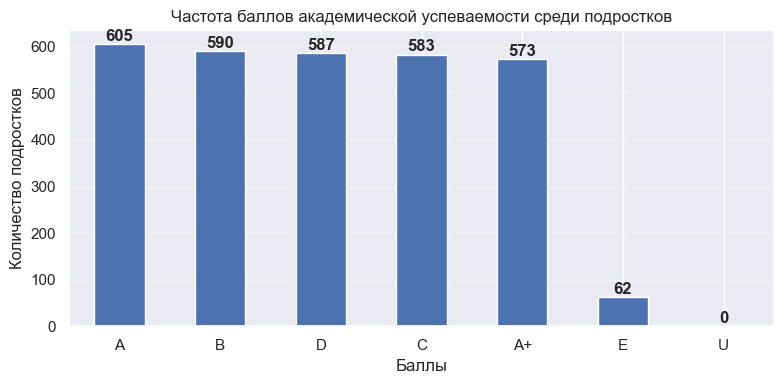

In [28]:
# Группировка по академическим баллам и подсчёт количества подростков
count_teen_academ = (teen_phone_addiction_df.groupby('academic_performance_level', observed=False)['id']
                      .agg(count_teenagers='count')
                      .sort_values('count_teenagers', ascending=False)
                      .reset_index())

# Строим столбчатую диаграмму
ax = count_teen_academ.plot(
    kind='bar',
    x='academic_performance_level',
    y='count_teenagers',
    rot=0,
    legend=False,
    title='Частота баллов академической успеваемости среди подростков',
    figsize=(8, 4)
)

# Добавляем подписи значений на столбцах
for i, v in enumerate(count_teen_academ['count_teenagers']):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.xlabel('Баллы')
plt.ylabel('Количество подростков')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Большинство подростков имеют наивысшие баллы по успеваемости (А+ и А). Подростки с самыми низкими баллами (U) в выборке отсутствуют.

## Вывод:

1. В датасете содержится 3000 записей о психологическом состоянии, физической активности и частоте использования смартфонов подростками в возрасте от 13 до 19 лет. По результатам знакомства с датасетом не было обнаружено столбцов с пропусками, в ряде столбцов был изменен тип данных и добавлено два столбца для удобства анализа
2. В выборке большинство подростков имеет наиболее высокие баллы по академической успеваемости.
3. Наиболее часто основной целью использования подростками смартфонов является просмотр интернета, на втором месте - прочие цели, на третьем месте - образование. Наименее часто смартфон используется для игр. Разница между всеми целями - незначительная.
Средний академический балл подростков (около 75 баллов) в разрезе целей использования отличается незначительно. Распределение баллов в разрезе целей использования смартфонов также схожее, что говорит о том, что нет корреляции успеваемости подростков и целей использования смартфонов
4. В выборке присутствуют подростки в возрасте от 13 до 19 лет, выборки каждого возраста по количеству подростков сопоставимое (отличается незначительно) - от 421 до 433 респондента
5. Можно сделать вывод о том, что с 13 до 18 лет депрессивное настроение у подростков склонно учащаться: в 13 лет бОльшее количество подростков имеет уровень депрессии - "1", к 18 годам увеличивается частота наивысшего балла депрессии - "10", в 19 лет распределение баллов более равномерное. Относительно уровней тревожности и самооценки - распределение частоты различных уровней по возрастам более равномерное среди подростков
6. Распределение общего количества времени, проводимого подростками в смартфонах имеет нормальную форму, т.к. медиана незначительно отличается от среднего значения. В среднем подростки тратят 5 часов в день на использование смартфона, минимально - 0, максимально - 11,5 часов
7. Наибольшая корреляция времени использования смартфона в день наблюдается с самооценкой (0.08), родительским контролем (0.08) и временем сна (0.07), но даже самые высокие значения корреляции являются незначительными (менее 0,1). Наименьшая корреляция с временем затраченным на физические упражнения, уровнем депрессии и академической успеваемостью.